In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Wafa/Documents/MINIPROJECT/data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [4]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Wafa/Documents/MINIPROJECT/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [5]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Wafa/Documents/MINIPROJECT/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [6]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [7]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
## Model - CNN
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), 
  layers.MaxPooling2D(), 
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(2, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build((None, 250, 250, 3))

In [9]:
## Training
filepath = "model.weights.h5"

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

# List of callbacks
callbacks_list = [checkpoint]

# Train the model
history = model.fit(training_data, validation_data=validation_data, epochs=20, callbacks=callbacks_list)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5007 - loss: 3.1059
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to model.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5025 - loss: 3.0083 - val_accuracy: 0.5306 - val_loss: 0.7194
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5645 - loss: 0.6803
Epoch 2: val_accuracy improved from 0.53061 to 0.58163, saving model to model.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5681 - loss: 0.6790 - val_accuracy: 0.5816 - val_loss: 0.8179
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6360 - loss: 0.6355
Epoch 3: val_accuracy improved from 0.58163 to 0.61224, saving model to model.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6395 - loss: 0.6335 - val_accuracy: 0.6122 - val_loss: 0.6555
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6927 - loss: 0.5695
Epoch 4: val_accuracy improved from 0.61224 to 0.69388, saving model to m

In [10]:
## Serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


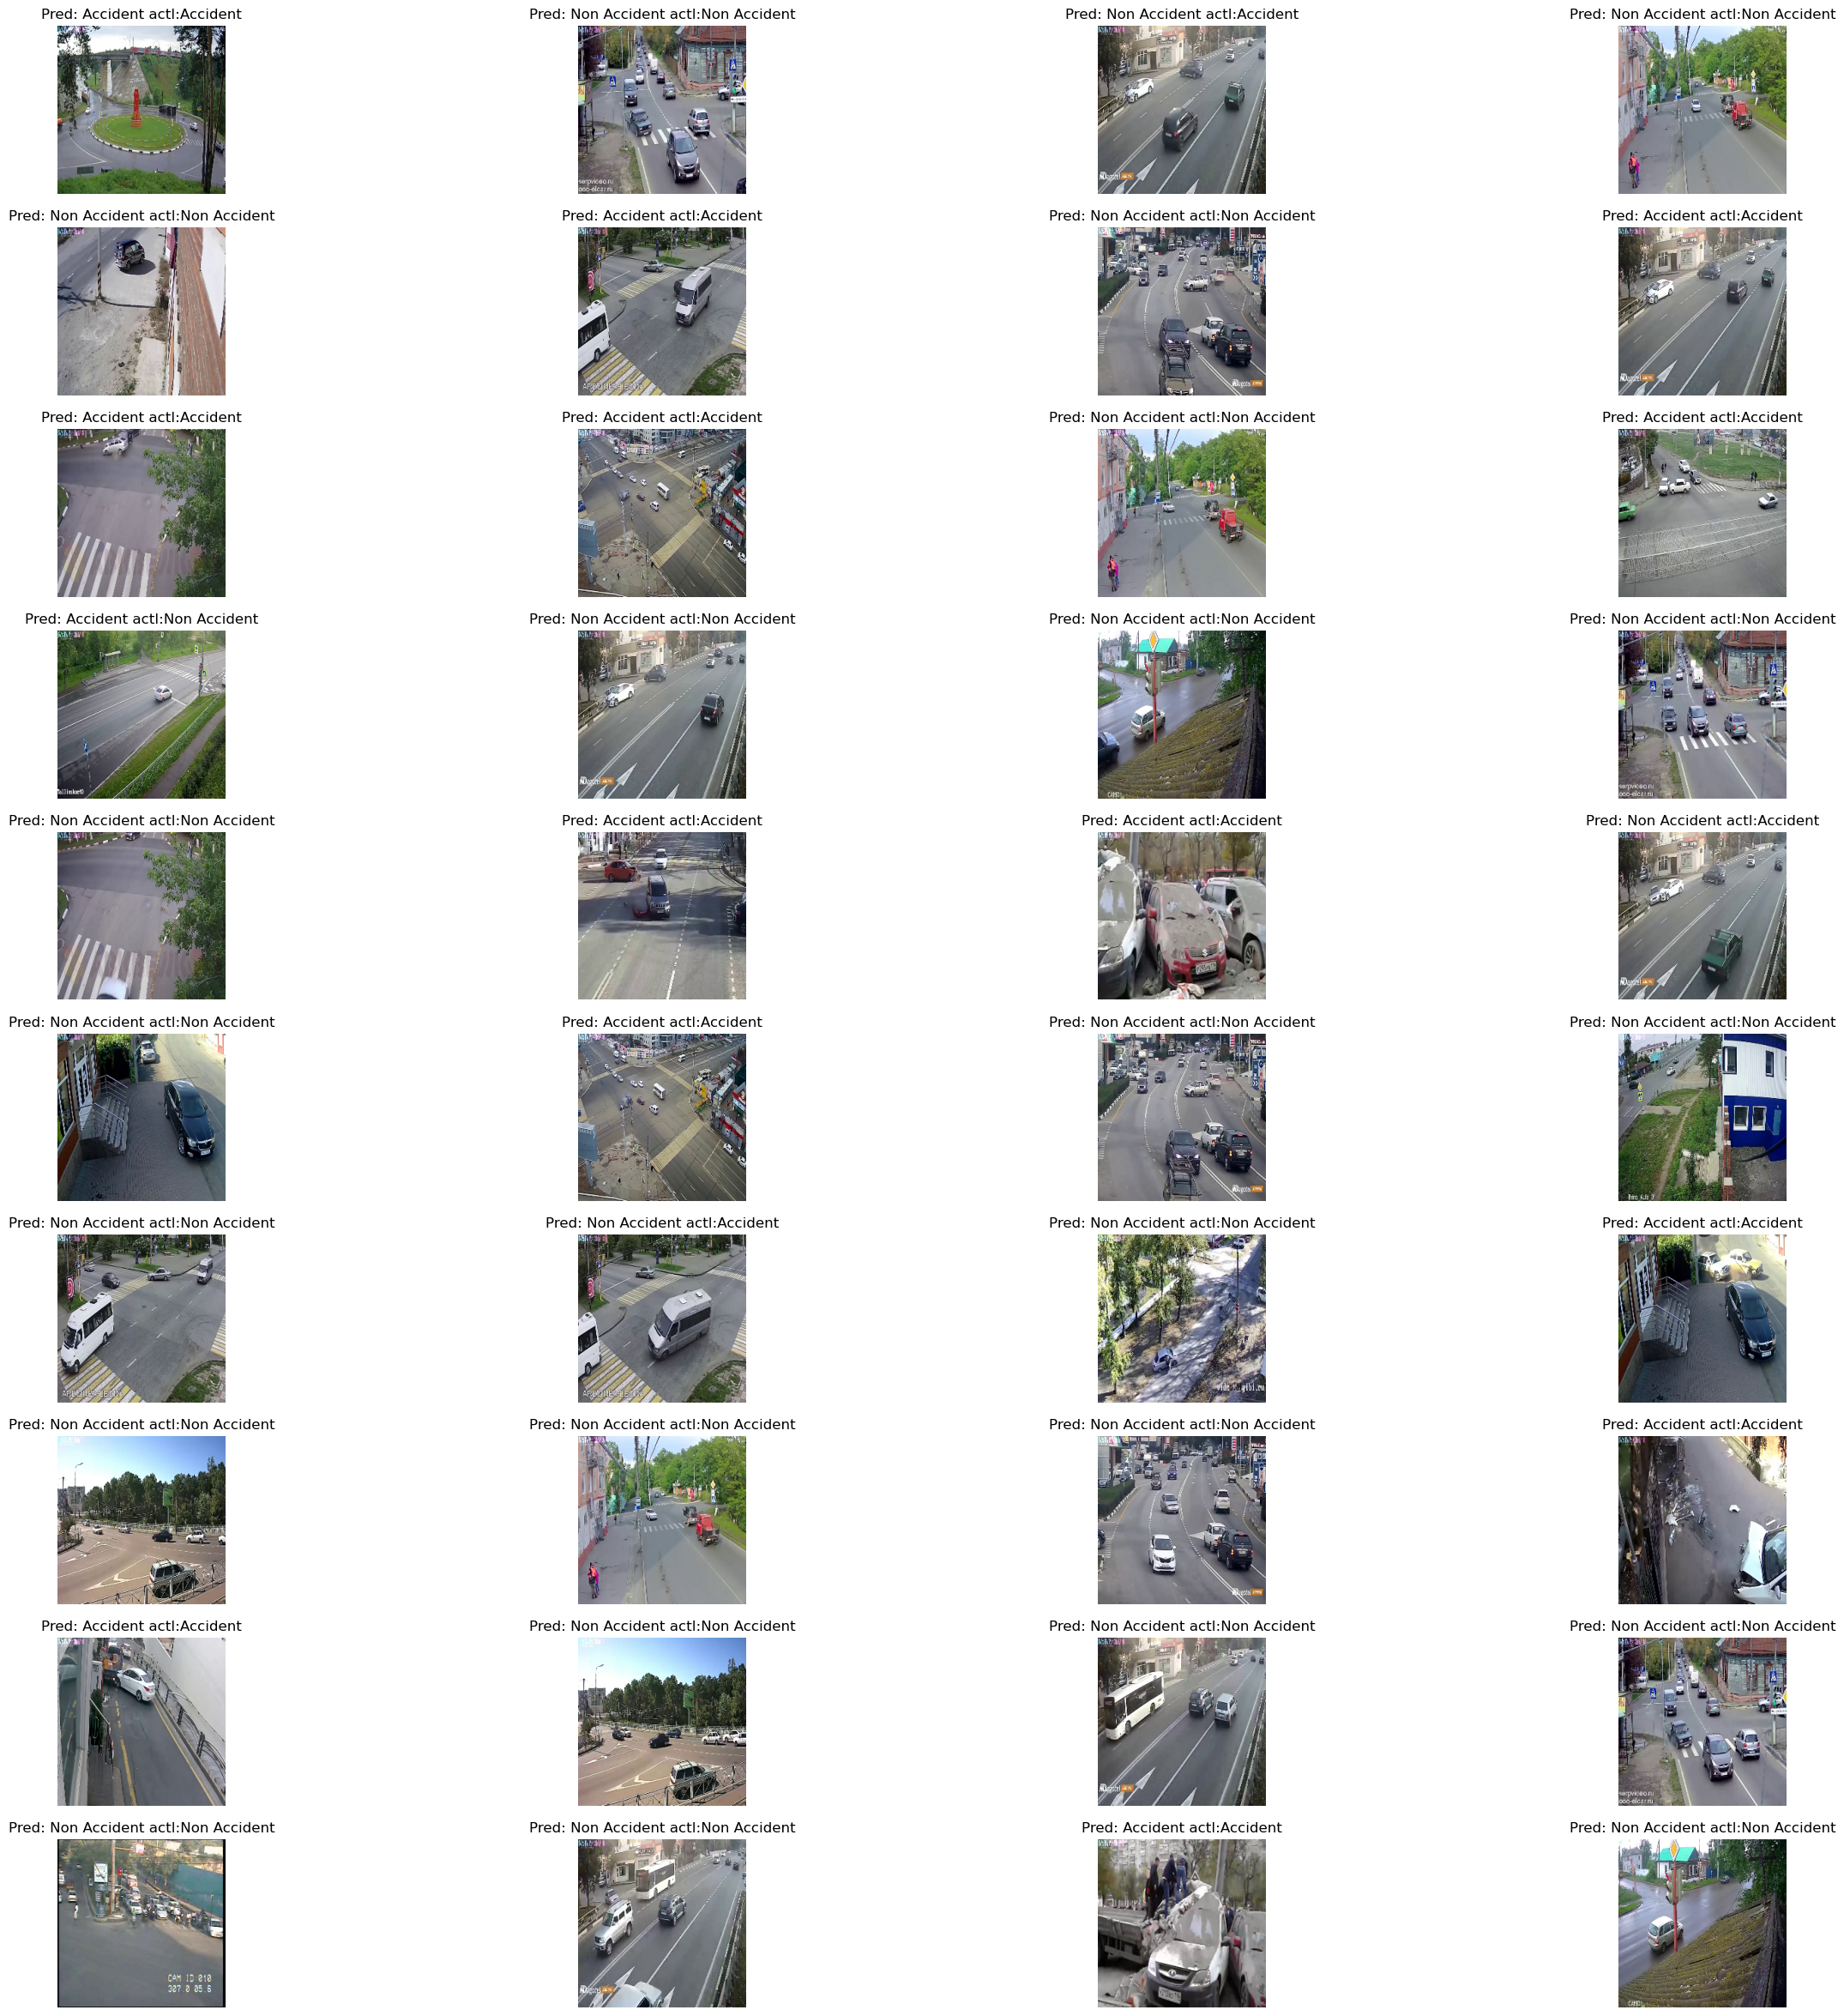

In [11]:
## Visualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)